# Program to predict if a person has a heart disease.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [2]:
hrtdf = pd.read_csv("heartdisease_data.csv")
hrtdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [3]:
hrtdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


There are no null values in the dataset, but there are strange values indeed '?'. Let's see what values they contain.

In [4]:
hrtdf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [5]:
hrtdf['slope'].value_counts()

?    102
2     53
3     29
1     16
Name: slope, dtype: int64

In [6]:
hrtdf['ca'].value_counts()

?    198
0      2
Name: ca, dtype: int64

In [7]:
hrtdf['thal'].value_counts()

?    166
7     22
6      8
3      4
Name: thal, dtype: int64

In [8]:
#Finding the columns containing '?' in their values
arr = []
for i in hrtdf.columns:
    if hrtdf[i].dtype == 'object' and '?' in list(hrtdf[i]):
        arr.append(i)

arr

['trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [9]:
for i in arr:
    print(hrtdf[i].value_counts())

?      56
120    16
130    15
140    10
110     9
150     9
160     8
122     6
142     5
124     4
144     4
128     4
136     4
126     4
170     4
134     4
158     3
132     3
155     2
125     2
180     2
154     2
152     2
116     2
104     2
138     2
112     2
0       1
100     1
127     1
118     1
114     1
172     1
96      1
156     1
178     1
146     1
106     1
190     1
135     1
102     1
Name: trestbps, dtype: int64
0      49
?       7
258     4
203     4
220     4
       ..
248     1
233     1
237     1
182     1
222     1
Name: chol, Length: 100, dtype: int64
0    125
1     68
?      7
Name: fbs, dtype: int64
?      53
120    12
140    12
110     8
112     6
130     6
150     4
105     4
100     4
128     4
160     4
118     4
135     3
84      3
122     3
117     3
102     3
108     3
148     3
86      3
125     3
106     3
165     2
111     2
98      2
119     2
80      2
154     2
96      2
129     2
180     2
138     2
127     2
69      1
161     1
113     1
13

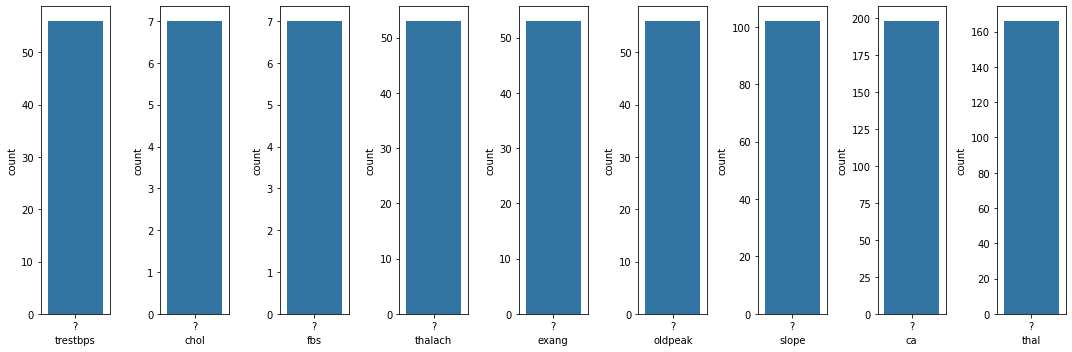

In [10]:
plt.figure(figsize=(15,5))
for i,j in enumerate(arr):
    plt.subplot(1,9,i+1)
    sns.countplot(hrtdf.loc[hrtdf[j] == '?', j])
    plt.tight_layout()

There are lots of '?' as values in many columns throughout the data set. We have only 2 '0' in column 'ca' and all other value is '?'. We can drop it. For the rest we can transform the '?' to some value.

In [11]:
hrtdf.loc[hrtdf['trestbps'] == '?', 'trestbps' ] = '191'
hrtdf.loc[hrtdf['chol'] == '?', 'chol' ] = '459'
hrtdf.loc[hrtdf['fbs'] == '?', 'fbs' ] = '2'
hrtdf.loc[hrtdf['thalach'] == '?', 'thalach' ] = '181'
hrtdf.loc[hrtdf['exang'] == '?', 'exang' ] = '2'
hrtdf.loc[hrtdf['oldpeak'] == '?', 'oldpeak' ] = '4.5'
hrtdf.loc[hrtdf['slope'] == '?', 'slope' ] = '4'
hrtdf.loc[hrtdf['ca'] == '?', 'ca' ] = '1'
hrtdf.loc[hrtdf['thal'] == '?', 'thal' ] = '8'

In [12]:
#Finding the columns containing '?' in their values
arr1 = []
for i in hrtdf.columns:
    if hrtdf[i].dtype == 'object' and '?' in list(hrtdf[i]):
        arr1.append(i)

arr1

[]

All the '?' values are converted to some value, the logic I used is I have replaced '?' with the next possible max value in that column.

In [13]:
for i in arr:
    print(hrtdf[i].value_counts())

191    56
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
124     4
144     4
128     4
136     4
126     4
170     4
134     4
158     3
132     3
155     2
125     2
180     2
154     2
152     2
116     2
104     2
138     2
112     2
0       1
100     1
127     1
118     1
114     1
172     1
96      1
156     1
178     1
146     1
106     1
190     1
135     1
102     1
Name: trestbps, dtype: int64
0      49
459     7
220     4
258     4
203     4
       ..
248     1
233     1
237     1
182     1
222     1
Name: chol, Length: 100, dtype: int64
0    125
1     68
2      7
Name: fbs, dtype: int64
181    53
120    12
140    12
110     8
130     6
112     6
128     4
160     4
118     4
150     4
100     4
105     4
122     3
117     3
84      3
135     3
102     3
108     3
106     3
125     3
86      3
148     3
119     2
98      2
80      2
96      2
111     2
154     2
180     2
138     2
129     2
165     2
127     2
155     1
69      1
161     1
14

In [14]:
for i in arr:
    hrtdf[i] = hrtdf[i].astype('float64')

In [15]:
hrtdf.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

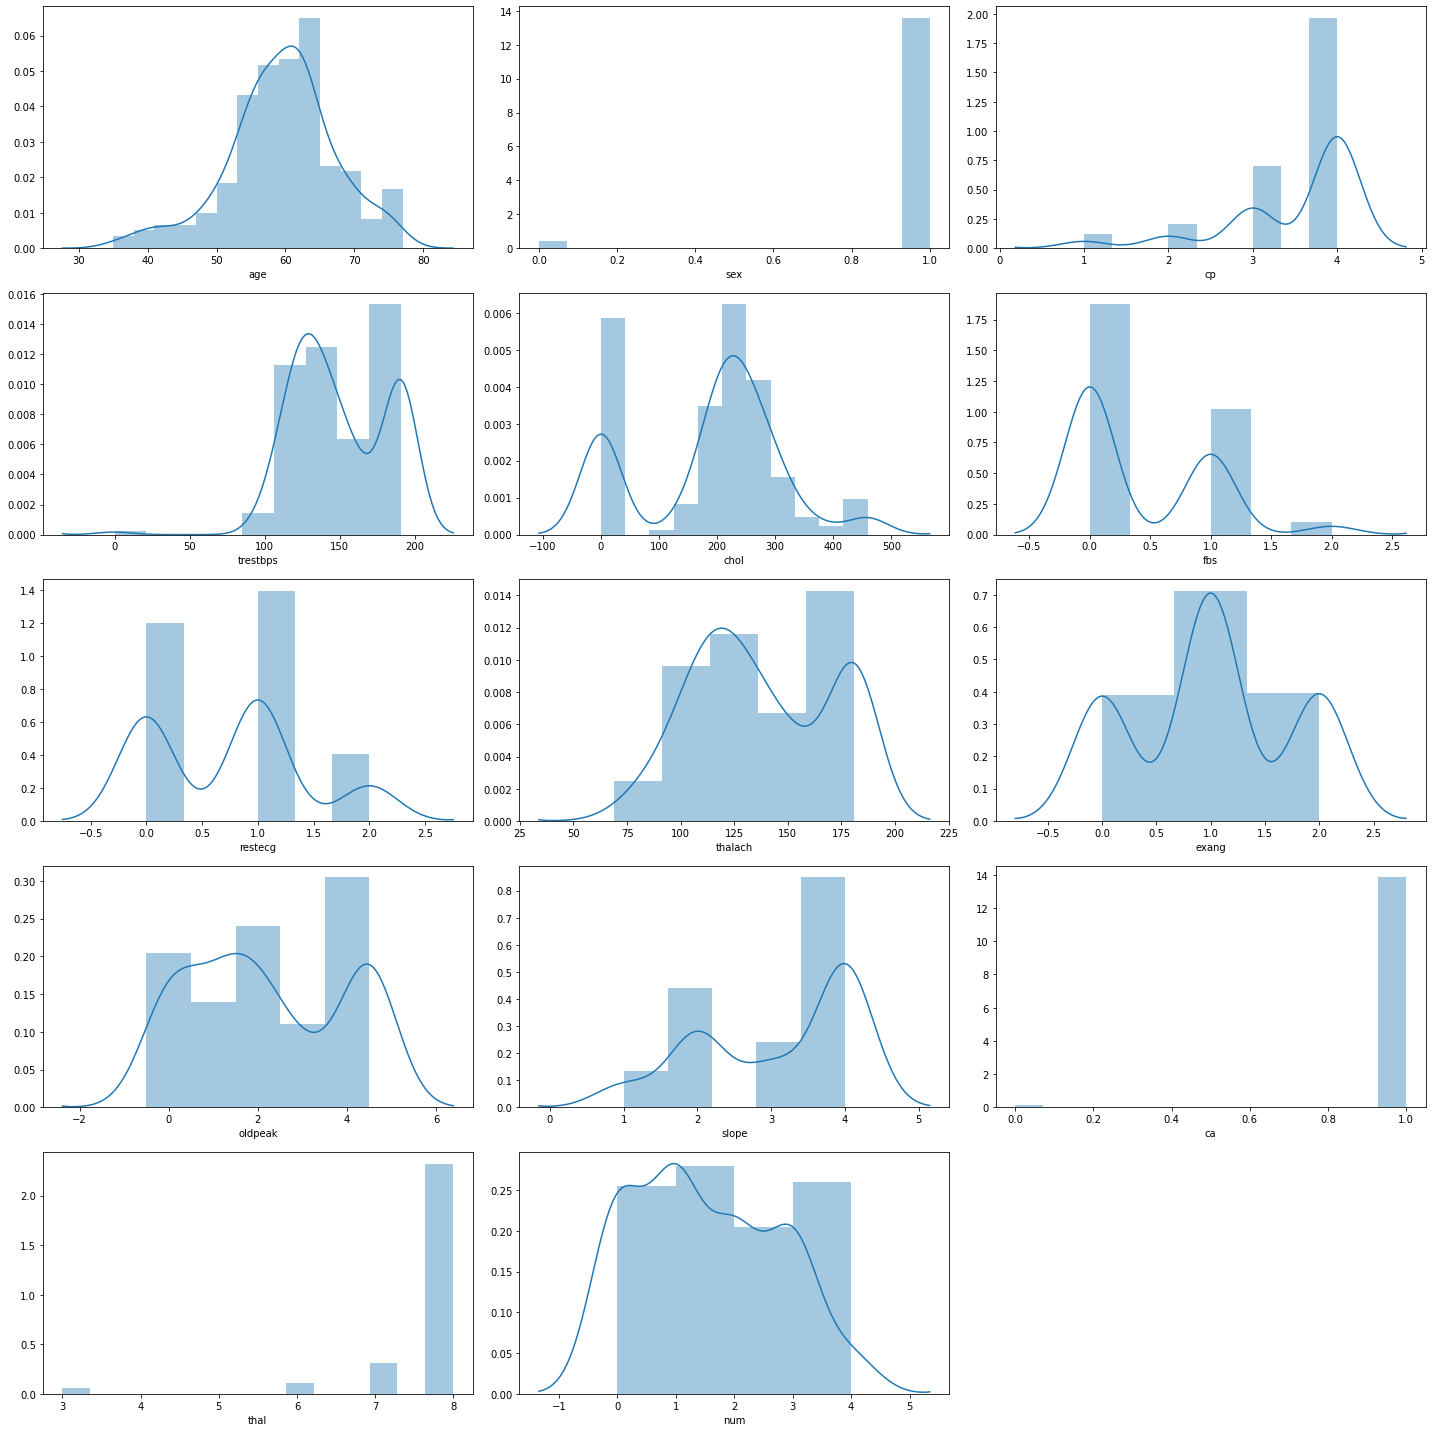

In [16]:
plt.figure(figsize=(20,20))
for i,j in enumerate(hrtdf.columns):
    plt.subplot(5,3,i+1)
    sns.distplot(hrtdf[j])
    plt.tight_layout()
plt.show()

In [17]:
hrtdf.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.270014
chol       -0.253012
fbs         0.968540
restecg     0.391463
thalach     0.084198
exang      -0.007615
oldpeak     0.173826
slope      -0.597696
ca         -9.923956
thal       -4.095304
num         0.297393
dtype: float64

The high skew columns have less number of unique values, so no need to transform them, its fine.

In [18]:
hrtdf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,149.790000,188.555000,0.410000,0.735000,138.220000,1.00500,2.211000,3.085000,0.990000,7.710000,1.520000
std,7.811697,0.171015,0.795701,31.576753,123.339777,0.559882,0.683455,31.905192,0.72637,1.710911,1.045582,0.099748,0.830269,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.00000,-0.500000,1.000000,0.000000,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.00000,1.000000,2.000000,1.000000,8.000000,0.000000
50%,60.000000,1.000000,4.000000,142.000000,217.500000,0.000000,1.000000,130.500000,1.00000,2.000000,4.000000,1.000000,8.000000,1.000000
75%,64.000000,1.000000,4.000000,191.000000,260.250000,1.000000,1.000000,181.000000,2.00000,4.500000,4.000000,1.000000,8.000000,3.000000
max,77.000000,1.000000,4.000000,191.000000,459.000000,2.000000,2.000000,181.000000,2.00000,4.500000,4.000000,1.000000,8.000000,4.000000


chol column seems to be having some outliers.

Let's check outliers

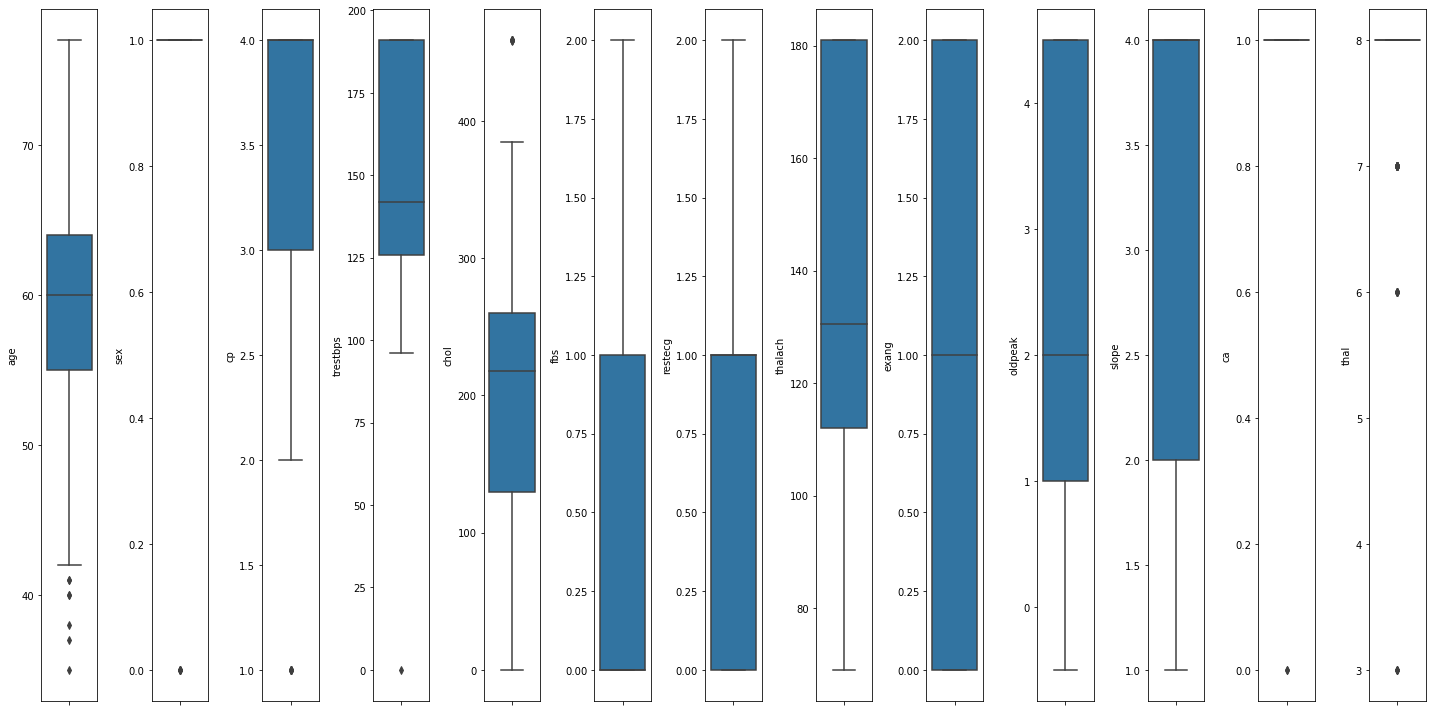

In [19]:
plt.figure(figsize=(20,10))
for i,j in enumerate(hrtdf.columns[:-1]):
    plt.subplot(1,13,i+1)
    sns.boxplot(hrtdf[j], orient='v')
    plt.tight_layout()
plt.show()

In [20]:
hrtdf.shape

(200, 14)

There are few outliers in columns age, cp, tresbps, chol, ca and thal

In [21]:
for i in hrtdf.columns:
    print(i,hrtdf[i].unique())

age [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]
sex [1 0]
cp [4 3 2 1]
trestbps [140. 130. 132. 142. 110. 120. 150. 180. 160. 126. 191. 128. 170. 152.
 116. 124.   0. 122. 144. 154. 125. 104. 136. 134. 138. 178. 146. 135.
 158. 106. 112. 102.  96. 172. 155. 156. 118. 100. 190. 114. 127.]
chol [260. 209. 218. 228. 213.   0. 236. 267. 166. 220. 177. 186. 100. 171.
 230. 281. 203. 277. 233. 240. 153. 224. 316. 311. 270. 217. 214. 252.
 339. 216. 276. 458. 241. 384. 297. 248. 308. 208. 227. 210. 245. 225.
 198. 195. 161. 258. 235. 305. 223. 282. 349. 459. 160. 312. 283. 142.
 211. 306. 222. 202. 197. 204. 274. 192. 298. 272. 200. 261. 181. 221.
 175. 219. 310. 232. 273. 182. 292. 289. 193. 170. 369. 173. 271. 244.
 285. 243. 237. 165. 287. 256. 264. 226. 207. 284. 337. 254. 300. 333.
 139. 385.]
fbs [0. 1. 2.]
restecg [1 2 0]
thalach [112. 127. 140. 149.  99. 120. 105. 141. 157. 117. 181. 148.  86.  84.
 125. 118. 

In [22]:
hrtdf_copy = hrtdf.copy()

In [23]:
from scipy.stats import zscore

In [24]:
hrtdf_copy['trestbps_Zscore'] = zscore(hrtdf_copy['trestbps'])
hrtdf_copy['chol_Zscore'] = zscore(hrtdf_copy['chol'])

There are several unique values which can be removed as outliers are only present in trestbps and chol, so let's clean the data of outliers.

In [25]:
hrtdf_copy['trestbps_Zscore'].sort_values(ascending=False)

69     1.308349
137    1.308349
167    1.308349
26     1.308349
44     1.308349
         ...   
125   -1.453756
102   -1.517253
175   -1.580750
103   -1.707743
33    -4.755583
Name: trestbps_Zscore, Length: 200, dtype: float64

In [26]:
hrtdf_copy['chol_Zscore'].sort_values(ascending=False)

107    2.198185
164    2.198185
165    2.198185
157    2.198185
155    2.198185
         ...   
40    -1.532581
39    -1.532581
37    -1.532581
35    -1.532581
99    -1.532581
Name: chol_Zscore, Length: 200, dtype: float64

In [27]:
hrtdf_copy.shape

(200, 16)

In [28]:
hrtdf_copy = hrtdf_copy[((hrtdf_copy['trestbps_Zscore'] < 3) & (hrtdf_copy['trestbps_Zscore'] > -3)) & ((hrtdf_copy['chol_Zscore'] < 3) & (hrtdf_copy['chol_Zscore'] > -3))]

In [29]:
hrtdf_copy.shape

(199, 16)

In [30]:
print("Max Zscore of trestbps:",hrtdf_copy['trestbps_Zscore'].max())
print("Min Zscore of trestbps:",hrtdf_copy['trestbps_Zscore'].min())

Max Zscore of trestbps: 1.3083489745188606
Min Zscore of trestbps: -1.7077430560390556


In [31]:
print("Max Zscore of chol:",hrtdf_copy['chol_Zscore'].max())
print("Min Zscore of chol:",hrtdf_copy['chol_Zscore'].min())

Max Zscore of chol: 2.198185095954222
Min Zscore of chol: -1.532580712409726


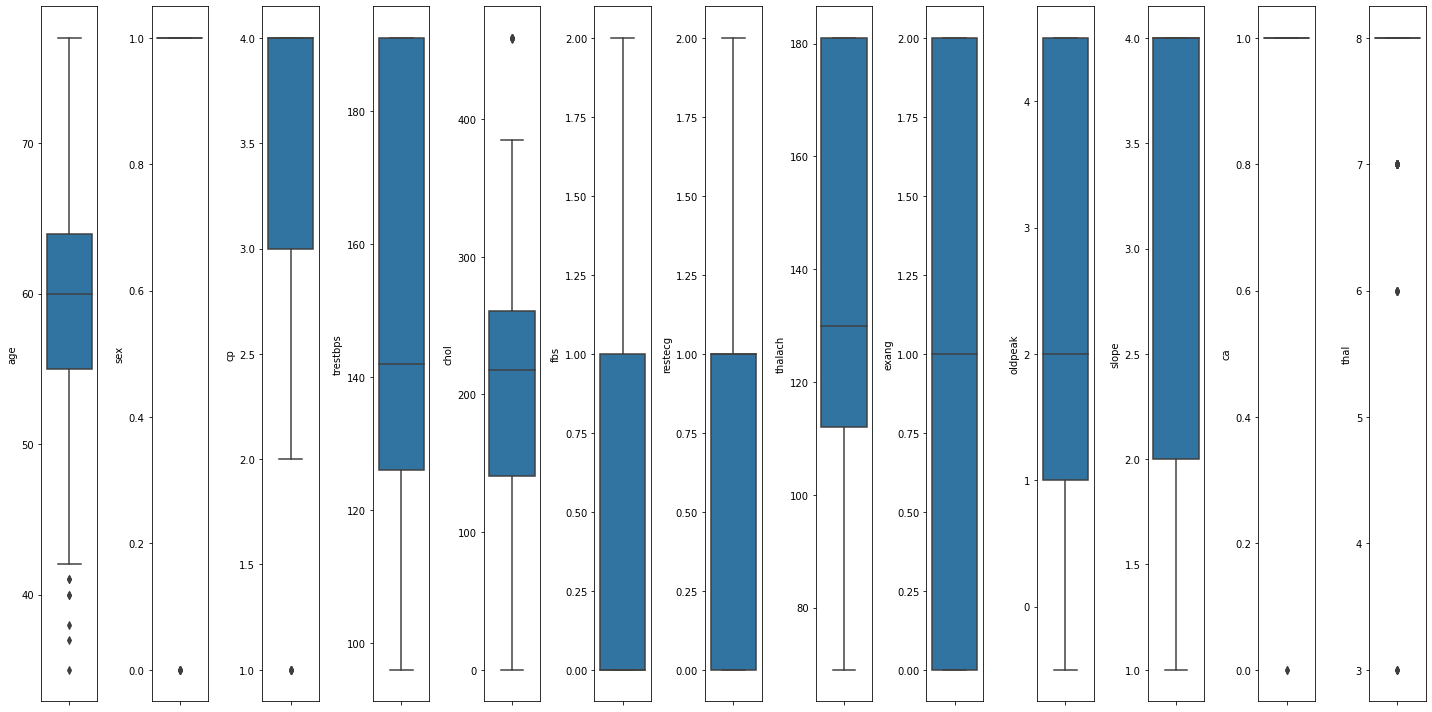

In [32]:
plt.figure(figsize=(20,10))
for i,j in enumerate(hrtdf_copy.columns[:-3]):
    plt.subplot(1,13,i+1)
    sns.boxplot(hrtdf_copy[j], orient='v')
    plt.tight_layout()
plt.show()

Let's do some correlation checks.

In [33]:
hrtdf_copy.drop(["trestbps_Zscore", "chol_Zscore"], 1, inplace=True)

In [34]:
cor = hrtdf_copy.corr()
cor.sort_values(by='num', ascending=False)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
num,0.292018,0.146953,0.172920,0.077588,0.101872,0.051561,-0.026384,-0.122317,0.079966,0.109839,-0.111966,0.083978,0.113265,1.000000
age,1.000000,0.034753,-0.040137,0.109076,0.078313,0.054701,-0.000627,-0.080770,0.079494,0.081923,-0.009689,0.024163,0.107478,0.292018
cp,-0.040137,0.038641,1.000000,-0.156259,0.076425,-0.052215,0.031467,-0.253344,-0.087588,-0.217625,-0.188766,-0.062423,-0.065218,0.172920
sex,0.034753,1.000000,0.038641,0.050667,-0.072378,-0.027732,0.061759,0.030245,0.043105,0.090856,0.043477,-0.017766,0.008896,0.146953
thal,0.107478,0.008896,-0.065218,0.201714,0.016895,-0.022745,-0.010268,0.085426,0.214271,0.253636,0.018848,0.025316,1.000000,0.113265
oldpeak,0.081923,0.090856,-0.217625,0.706233,0.118258,-0.031506,-0.022173,0.743240,0.749062,1.000000,0.273167,0.042101,0.253636,0.109839
chol,0.078313,-0.072378,0.076425,0.114049,1.000000,0.028866,0.045115,0.091924,0.125304,0.118258,0.105139,0.114641,0.016895,0.101872
ca,0.024163,-0.017766,-0.062423,0.045900,0.114641,0.074257,0.035293,0.039932,0.001401,0.042101,0.008740,1.000000,0.025316,0.083978
exang,0.079494,0.043105,-0.087588,0.733785,0.125304,-0.109714,-0.025273,0.647745,1.000000,0.749062,0.325473,0.001401,0.214271,0.079966
trestbps,0.109076,0.050667,-0.156259,1.000000,0.114049,0.037034,0.055370,0.672209,0.733785,0.706233,0.474849,0.045900,0.201714,0.077588


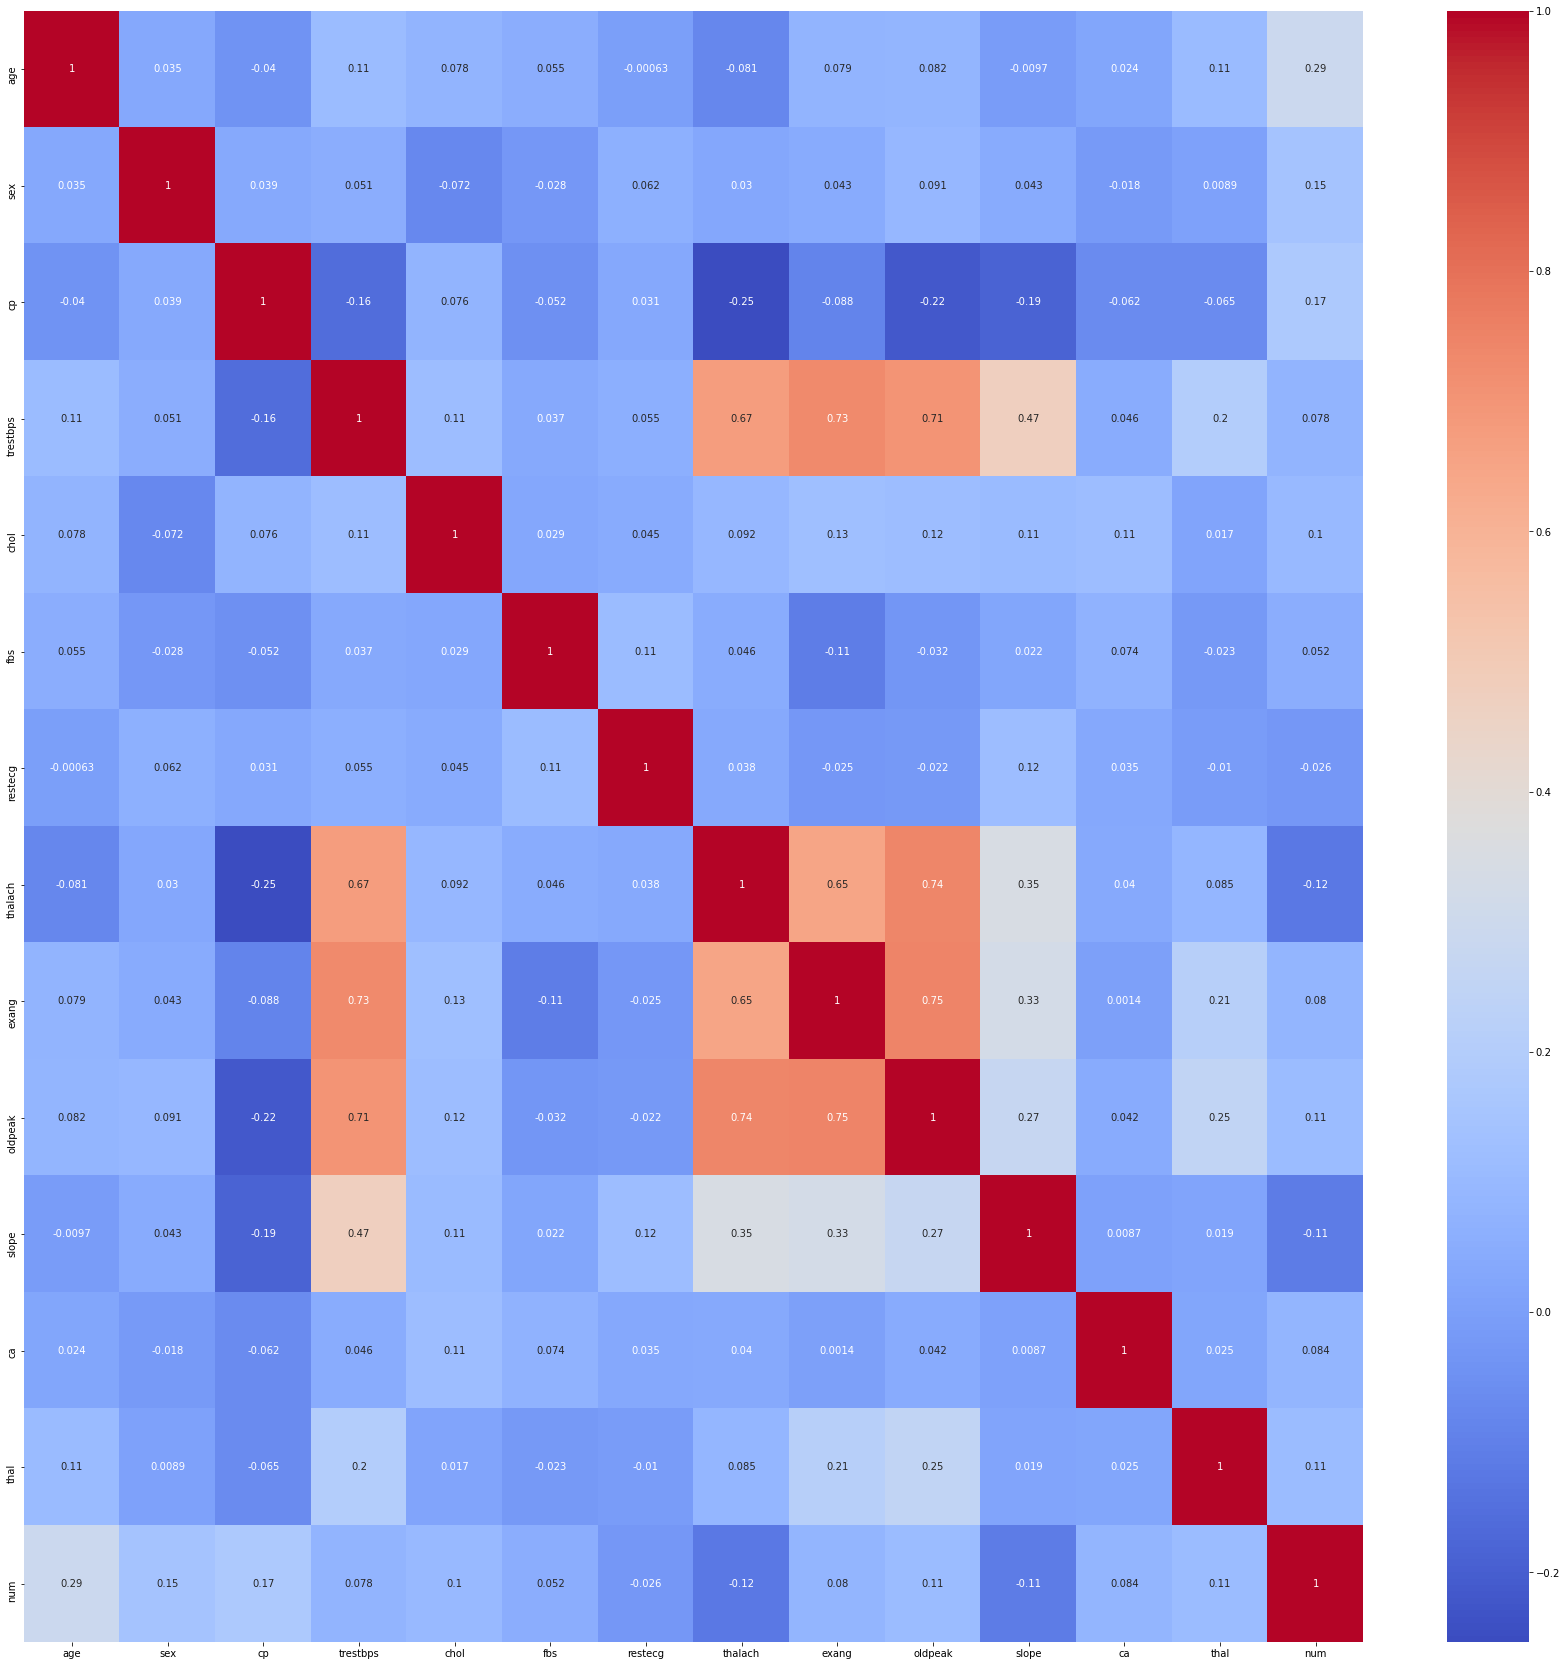

In [35]:
#Let's plot the correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

Highest positive correlation with num is of clumns age, cp, sex, thal, oldpeak, chol.

ca, exang, trestbps and fbs also have some positive correlation.

Highest negative correlation with num is of columns thalach, slope

restecg also have little negative correlation with num.

let's split trai and test data

In [36]:
hrtdf_copy.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.371859,0.969849,3.507538,150.542714,189.502513,0.412060,0.738693,138.135678,1.010050,2.214573,3.090452,0.989950,7.708543,1.512563
std,7.825264,0.171433,0.796896,29.803344,122.918955,0.560533,0.683175,31.963310,0.724673,1.714477,1.045365,0.099997,0.832107,1.217960
min,35.000000,0.000000,1.000000,96.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000,3.000000,0.000000
25%,55.000000,1.000000,3.000000,126.000000,140.500000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,1.000000,8.000000,0.000000
50%,60.000000,1.000000,4.000000,142.000000,218.000000,0.000000,1.000000,130.000000,1.000000,2.000000,4.000000,1.000000,8.000000,1.000000
75%,64.000000,1.000000,4.000000,191.000000,260.500000,1.000000,1.000000,181.000000,2.000000,4.500000,4.000000,1.000000,8.000000,3.000000
max,77.000000,1.000000,4.000000,191.000000,459.000000,2.000000,2.000000,181.000000,2.000000,4.500000,4.000000,1.000000,8.000000,4.000000


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in hrtdf_copy.columns:
    if i != 'num':
        hrtdf_copy[[i]] = scaler.fit_transform(hrtdf_copy[[i]])

hrtdf_copy.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.580282,0.969849,0.835846,0.574134,0.412860,0.206030,0.369347,0.617283,0.505025,0.542915,0.696817,0.989950,0.941709,1.512563
std,0.186316,0.171433,0.265632,0.313719,0.267797,0.280267,0.341587,0.285387,0.362337,0.342895,0.348455,0.099997,0.166421,1.217960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476190,1.000000,0.666667,0.315789,0.306100,0.000000,0.000000,0.383929,0.000000,0.300000,0.333333,1.000000,1.000000,0.000000
50%,0.595238,1.000000,1.000000,0.484211,0.474946,0.000000,0.500000,0.544643,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000
75%,0.690476,1.000000,1.000000,1.000000,0.567538,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [38]:
hrtdf_copy['num'].value_counts()

1    56
0    51
3    41
2    41
4    10
Name: num, dtype: int64

In [39]:
hrtdf_copy.loc[(hrtdf_copy['num'] == 2) | (hrtdf_copy['num'] == 3) | (hrtdf_copy['num'] == 4)] = 1

In [40]:
hrtdf_copy['num'].value_counts()

1    148
0     51
Name: num, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X = hrtdf_copy.drop("num",1)
Y = hrtdf_copy['num']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=7, stratify=hrtdf_copy['num'])

In [42]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve, f1_score, accuracy_score, roc_auc_score, make_scorer, average_precision_score

In [44]:
lm = LogisticRegression()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
gnc = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
gbc = GradientBoostingRegressor()
xbc = XGBClassifier()

In [45]:
models = [dtc, knc, gnc, svc, rfc, gbc]
modelname = ['DecisionTree Classification',
             'KNeighbors Classification', 'Gaussian NB', 'SVC',
             'RandomForestClassifier', 'GradientBoostingRegressor']

In [46]:
score_table = pd.DataFrame(columns=['Model Name', 'Average Precision Score Mean', 'ROC AUC Score Mean'])
for i,j in enumerate(models):
    cv_avpsc_score = cross_val_score(j, X_train, y_train, cv=5, scoring='average_precision')
    cv_roc_auc_score = cross_val_score(j, X_train, y_train, cv=5, scoring='roc_auc')
    score_table.loc[i] = [modelname[i], np.mean(cv_avpsc_score), np.mean(cv_roc_auc_score)]

score_table.sort_values(by='ROC AUC Score Mean', ascending=False)

,Model Name,Average Precision Score Mean,ROC AUC Score Mean
1,KNeighbors Classification,0.938477,0.831134
4,RandomForestClassifier,0.937654,0.816558
3,SVC,0.923003,0.795624
2,Gaussian NB,0.932633,0.793626
5,GradientBoostingRegressor,0.883761,0.733112
0,DecisionTree Classification,0.816386,0.667095


KNeighbors Classification and Random Forest Classification seems best for this prediction, let's fine tune their parameters.

In [47]:
#Parameters
kncparams = {'n_neighbors' : range(3,11), 'weights' : ['uniform', 'distance']}
rfcparams = {'criterion' : ['gini', 'entropy'], 'n_estimators' : range(50,80), 'random_state' : range(50,110)}
svcparams = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'], 'C' : range(50,80), 'random_state' : range(50,110)}
gncparams = {'var_smoothing': np.logspace(0,-9, num=100)}

In [48]:
kncgs = GridSearchCV(knc, kncparams,return_train_score = False, cv = 5, scoring='roc_auc')
kncgs.fit(X, Y)
kncDF = pd.DataFrame(kncgs.cv_results_)
kncDF['mean_test_score'] = np.abs(kncDF['mean_test_score'])
kncDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
14,"{'n_neighbors': 10, 'weights': 'uniform'}",0.863612
10,"{'n_neighbors': 8, 'weights': 'uniform'}",0.862373
12,"{'n_neighbors': 9, 'weights': 'uniform'}",0.862270
11,"{'n_neighbors': 8, 'weights': 'distance'}",0.861202
13,"{'n_neighbors': 9, 'weights': 'distance'}",0.861126
15,"{'n_neighbors': 10, 'weights': 'distance'}",0.860529
8,"{'n_neighbors': 7, 'weights': 'uniform'}",0.856896
9,"{'n_neighbors': 7, 'weights': 'distance'}",0.843760
6,"{'n_neighbors': 6, 'weights': 'uniform'}",0.837676
7,"{'n_neighbors': 6, 'weights': 'distance'}",0.832230


In [49]:
svcgs = GridSearchCV(svc, svcparams,return_train_score = False, cv = 5, scoring='roc_auc')
svcgs.fit(X, Y)
svcDF = pd.DataFrame(svcgs.cv_results_)
svcDF['mean_test_score'] = np.abs(svcDF['mean_test_score'])
svcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
4321,"{'C': 68, 'kernel': 'linear', 'random_state': 51}",0.824871
5044,"{'C': 71, 'kernel': 'linear', 'random_state': 54}",0.824871
5066,"{'C': 71, 'kernel': 'linear', 'random_state': 76}",0.824871
5065,"{'C': 71, 'kernel': 'linear', 'random_state': 75}",0.824871
5064,"{'C': 71, 'kernel': 'linear', 'random_state': 74}",0.824871
...,...,...
682,"{'C': 52, 'kernel': 'sigmoid', 'random_state':...",0.197703
681,"{'C': 52, 'kernel': 'sigmoid', 'random_state':...",0.197703
680,"{'C': 52, 'kernel': 'sigmoid', 'random_state':...",0.197703
679,"{'C': 52, 'kernel': 'sigmoid', 'random_state':...",0.197703


In [50]:
rfcgs = GridSearchCV(rfc, rfcparams,return_train_score = False, cv = 5, scoring='roc_auc')
rfcgs.fit(X, Y)
rfcDF = pd.DataFrame(rfcgs.cv_results_)
rfcDF['mean_test_score'] = np.abs(rfcDF['mean_test_score'])
rfcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
24,"{'criterion': 'gini', 'n_estimators': 50, 'ran...",0.871586
84,"{'criterion': 'gini', 'n_estimators': 51, 'ran...",0.870218
444,"{'criterion': 'gini', 'n_estimators': 57, 'ran...",0.870131
384,"{'criterion': 'gini', 'n_estimators': 56, 'ran...",0.870127
857,"{'criterion': 'gini', 'n_estimators': 64, 'ran...",0.869150
...,...,...
2961,"{'criterion': 'entropy', 'n_estimators': 69, '...",0.832231
2481,"{'criterion': 'entropy', 'n_estimators': 61, '...",0.831858
1865,"{'criterion': 'entropy', 'n_estimators': 51, '...",0.831482
42,"{'criterion': 'gini', 'n_estimators': 50, 'ran...",0.830751


In [53]:
param = rfcDF.iloc[24]
param

mean_fit_time                                                  0.077352
std_fit_time                                                  0.0072178
mean_score_time                                              0.00859475
std_score_time                                               0.00135609
param_criterion                                                    gini
param_n_estimators                                                   50
param_random_state                                                   74
params                {'criterion': 'gini', 'n_estimators': 50, 'ran...
split0_test_score                                              0.878333
split1_test_score                                                 0.925
split2_test_score                                              0.866667
split3_test_score                                              0.896552
split4_test_score                                              0.791379
mean_test_score                                                0

In [51]:
gncgs = GridSearchCV(gnc, gncparams,return_train_score = False, cv = 5, scoring='roc_auc')
gncgs.fit(X, Y)
gncDF = pd.DataFrame(gncgs.cv_results_)
gncDF['mean_test_score'] = np.abs(gncDF['mean_test_score'])
gncDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

,params,mean_test_score
4,{'var_smoothing': 0.43287612810830584},0.820617
3,{'var_smoothing': 0.533669923120631},0.819340
0,{'var_smoothing': 1.0},0.818644
2,{'var_smoothing': 0.657933224657568},0.818604
10,{'var_smoothing': 0.12328467394420659},0.817904
...,...,...
43,{'var_smoothing': 0.0001232846739442066},0.784706
42,{'var_smoothing': 0.0001519911082952933},0.784706
41,{'var_smoothing': 0.0001873817422860383},0.784706
40,{'var_smoothing': 0.0002310129700083158},0.784706


Best working model is Random Forest Classifier. Let's get the best parmeterized model.

In [57]:
rf_model = rfcgs.fit(X_train, y_train).best_estimator_
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

In [58]:
confusion_matrix(pred, y_test)

array([[ 7,  5],
       [ 6, 32]], dtype=int64)

In [59]:
print(classification_report(pred, y_test))
print(accuracy_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.86      0.84      0.85        38

    accuracy                           0.78        50
   macro avg       0.70      0.71      0.71        50
weighted avg       0.79      0.78      0.78        50

0.78


In [64]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

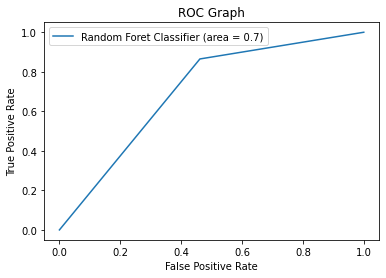

In [65]:
plt.plot(fpr, tpr, label='Random Foret Classifier (area = {})' .format(round(roc_auc_score(y_test, pred),2)))
plt.legend(loc="top left")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.show()

In [61]:
# save the model to disk
filename = 'final_model.pkl'
joblib.dump(rf_model, filename)

['final_model.pkl']

In [63]:
# load the model from disk
load_model = joblib.load(filename)
result = load_model.score(X_test, y_test)
print(result)

0.78
